In [1]:
import sys
#sys.path.append('/home/james/Dropbox (MIT)/All_Resourceful/dag_planner/dag-plan')
#sys.path.append('/home/james/Dropbox (MIT)/All_Resourceful/localgateway')
sys.path.append('../../../dag_planner/dag-plan')
sys.path.append('/home/jjlong/localgateway')
from app.dag_solver import solve_DAG
from app.batt_dag_solver import solve_batt_DAG
from app.views import inted
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import random
import math
import functools
from scipy.stats import rv_discrete
from beeview_gateway import parse_dag_stats as pds
import copy

In [ ]:
def jump_time(mean_val):
    return random.expovariate(1./mean_val)
sns.distplot([jump_time(50) for _ in range(10000)])
sns.despine()

In [8]:
def gen_times(interval, numdays):
    every_day = 24/interval
    numintervals = int(numdays*every_day)
    return [i*interval for i in range(1,numintervals+1)]
def poisson_pmf(mean_per_unittime, t, numevents):
    r = mean_per_unittime
    return ((r*t)**numevents)*math.exp(-r*t)/math.factorial(numevents)
def poisson_sample(intensity, t, numsims=1):
    xs = range(100)
    pmf = [poisson_pmf(intensity, t, x) for x in xs]
    sample=rv_discrete(values=(xs,pmf)).rvs(size=numsims)
    return sample
def markov_step(intensity, previous, time_elapsed, units=1):
    num_down = poisson_sample(intensity, time_elapsed, numsims=1)[0]
    return max(units, previous-num_down*units)
def markov_walker(accumed, next_ti):
    """accumed is a list of (t, value) tuples"""
    previous_t, previous_val = accumed[-1]
    this_t, this_i = next_ti
    time_elapsed = this_t - previous_t
    this_val = markov_step(this_i, previous_val
                          ,time_elapsed, units=0.001)
    accumed.append((this_t, previous_val))
    accumed.append((this_t, this_val))
    return accumed
interval = 6#hours
intensity = 0.05#changes per hour
times = gen_times(interval,180)
intensities = [intensity for _ in times]
initial_conditions = [(0,0.95)]
def walker(times, intensity, initial_conditions):
    intensities = [intensity for _ in times]
    result = functools.reduce(markov_walker, zip(times, intensities), initial_conditions)
    return result
nodes = [str(i) for i in range(20)]
intensities = [random.gauss(0.01,0.001) for node in nodes]
inits = [[(0,1)] for node in nodes]
node_startinfo = {n[0]:{'intensity':n[1], 'initial':n[2]}
        for n in zip(nodes, intensities, inits)}
walkfun = functools.partial(walker, times)
#all_sims = {node:walkfun(v['intensity'], v['initial'])
#            for node, v in node_startinfo.items()}

In [ ]:
fig, ax = plt.subplots(1)
for node, result in all_sims.items():
    ax.plot([i[0] for i in result], [i[1] for i in result])
ax.set_ylim([0,1.1])
sns.despine()

In [9]:
bw = {"61": {"61": 0.0, "96": 19.58, "95": 9.79, "64": 9.79, "0": 39.79, "68": 9.79, "55": 19.58, "53": 19.58, "46": 9.79, "39": 29.36, "31": 19.62, "43": 29.37, "40": 19.58, "69": 9.79, "18": 19.58, "41": 29.36, "58": 29.37, "49": 9.79, "56": 29.37, "32": 29.36, "15": 29.37, "17": 29.37, "37": 19.58, "22": 29.36, "63": 19.58}, "96": {"61": 9.79, "96": 0.0, "95": 9.79, "64": 9.79, "0": 49.57, "68": 19.58, "55": 29.37, "53": 9.79, "46": 9.79, "39": 29.36, "31": 29.4, "43": 39.15, "40": 29.36, "69": 19.58, "18": 29.36, "41": 39.15, "58": 39.15, "49": 9.79, "56": 39.15, "32": 9.79, "15": 39.15, "17": 39.15, "37": 29.37, "22": 39.15, "63": 19.58}, "95": {"61": 29.36, "96": 19.58, "95": 0.0, "64": 19.58, "0": 39.78, "55": 29.36, "53": 29.36, "46": 29.36, "39": 19.58, "68": 19.58, "43": 29.36, "40": 29.36, "69": 29.36, "18": 29.36, "41": 39.15, "58": 39.15, "49": 9.79, "31": 29.4, "56": 29.36, "32": 29.36, "15": 29.36, "17": 29.36, "37": 29.37, "22": 29.37, "63": 9.79}, "64": {"64": 0.0}, "0": {"61": 41.34, "96": 31.55, "95": 41.34, "64": 41.34, "0": 0.0, "55": 60.91, "53": 41.34, "46": 41.34, "39": 51.12, "68": 51.12, "43": 31.55, "40": 31.55, "69": 31.55, "18": 41.34, "41": 41.34, "58": 70.7, "49": 31.55, "31": 11.97, "56": 41.34, "32": 31.55, "15": 21.76, "17": 41.34, "37": 31.55, "22": 21.76, "63": 51.12}, "55": {"61": 9.79, "96": 9.79, "95": 9.79, "64": 9.79, "0": 23.18, "55": 0.0, "53": 19.58, "46": 19.58, "39": 19.58, "68": 19.58, "43": 19.58, "40": 19.58, "69": 9.79, "18": 19.58, "41": 29.36, "58": 9.79, "49": 19.58, "31": 19.62, "56": 29.36, "32": 19.58, "15": 9.79, "17": 9.79, "37": 19.58, "22": 9.79, "63": 19.58}, "53": {"61": 39.15, "96": 29.36, "95": 9.79, "64": 29.37, "0": 49.57, "55": 39.15, "53": 0.0, "46": 39.15, "39": 29.36, "68": 29.36, "43": 39.15, "40": 39.15, "69": 39.15, "18": 39.15, "41": 48.94, "58": 48.94, "49": 19.58, "31": 39.19, "56": 39.15, "32": 39.15, "15": 39.15, "17": 39.15, "37": 39.16, "22": 39.16, "63": 19.58}, "46": {"61": 39.15, "96": 29.36, "95": 9.79, "64": 29.37, "0": 49.57, "55": 39.15, "53": 39.15, "46": 0.0, "39": 29.36, "68": 29.36, "43": 39.15, "40": 39.15, "69": 39.15, "18": 39.15, "41": 48.94, "58": 48.94, "49": 19.58, "31": 39.19, "56": 39.15, "32": 39.15, "15": 39.15, "17": 39.15, "37": 39.16, "22": 39.16, "63": 19.58}, "39": {"61": 9.79, "96": 9.79, "95": 19.58, "64": 9.79, "0": 20.2, "55": 9.79, "53": 9.79, "46": 19.58, "39": 0.0, "68": 19.58, "43": 9.79, "40": 9.79, "69": 19.58, "18": 19.58, "41": 29.36, "58": 19.58, "49": 9.79, "31": 19.76, "56": 9.79, "32": 19.58, "15": 9.79, "17": 9.79, "37": 19.58, "22": 9.79, "63": 29.36}, "68": {"61": 19.58, "96": 19.58, "95": 9.79, "64": 9.79, "0": 30.0, "68": 0.0, "55": 9.79, "53": 9.79, "46": 9.79, "39": 19.58, "31": 9.83, "43": 19.58, "40": 9.79, "69": 9.79, "18": 9.79, "41": 19.58, "58": 19.58, "49": 9.79, "56": 19.58, "32": 19.58, "15": 19.58, "17": 19.58, "37": 9.79, "22": 19.58, "63": 19.58}, "43": {"61": 19.58, "96": 9.79, "95": 9.79, "64": 19.58, "0": 10.41, "68": 29.36, "55": 39.15, "53": 19.58, "46": 19.58, "39": 29.36, "31": 19.76, "43": 0.0, "40": 29.36, "69": 29.36, "18": 39.15, "41": 39.16, "58": 48.94, "49": 19.58, "56": 39.15, "32": 19.58, "15": 19.58, "17": 9.79, "37": 29.36, "22": 19.58, "63": 19.58}, "40": {"40": 0.0}, "69": {"61": 19.58, "96": 9.79, "95": 9.79, "64": 19.58, "0": 36.39, "55": 39.15, "53": 19.58, "46": 19.58, "39": 29.36, "68": 29.36, "43": 39.15, "40": 39.15, "69": 0.0, "18": 39.15, "41": 48.94, "58": 48.94, "49": 19.58, "31": 39.19, "56": 39.15, "32": 19.58, "15": 39.15, "17": 39.15, "37": 39.16, "22": 39.16, "63": 19.58}, "18": {"61": 19.58, "96": 19.58, "64": 19.58, "0": 27.2, "55": 19.58, "53": 9.79, "46": 29.36, "39": 9.79, "68": 19.58, "43": 19.58, "40": 19.58, "69": 19.58, "18": 0.0, "41": 9.79, "58": 29.36, "49": 9.79, "22": 9.79, "31": 10.08, "56": 19.58, "32": 9.79, "15": 19.58, "17": 9.79, "37": 29.36, "95": 19.58, "63": 9.79}, "41": {"61": 29.36, "96": 19.58, "95": 9.79, "64": 29.36, "0": 19.58, "68": 29.36, "55": 39.15, "53": 29.36, "46": 29.37, "39": 29.36, "31": 29.54, "43": 9.79, "40": 19.58, "69": 19.58, "18": 39.15, "41": 0.0, "58": 48.94, "49": 19.58, "56": 39.15, "32": 29.36, "15": 29.36, "17": 19.58, "37": 39.15, "22": 9.79, "63": 19.58}, "58": {"61": 19.58, "96": 9.79, "95": 9.79, "64": 9.79, "0": 23.18, "68": 9.79, "55": 19.58, "53": 9.79, "46": 9.79, "39": 9.79, "31": 9.83, "43": 19.58, "40": 19.58, "69": 19.58, "18": 9.79, "41": 19.58, "58": 0.0, "49": 19.58, "56": 19.58, "32": 19.58, "15": 9.79, "17": 9.79, "37": 19.58, "22": 19.58, "63": 19.58}, "49": {"49": 0.0}, "31": {"61": 29.36, "96": 19.58, "95": 29.36, "64": 29.36, "0": 23.18, "55": 48.94, "53": 29.36, "46": 29.37, "39": 39.15, "68": 39.15, "43": 19.58, "40": 19.58, "69": 19.58, "18": 29.36, "41": 29.37, "58": 58.73, "49": 19.58, "31": 0.0, "56": 29.36, "32": 19.58, "15": 9.79, "17": 29.36, "37": 19.58, "22": 9.79, "63": 39.15}, "56": {"61": 19.58, "96": 9.79, "95": 19.58, "64": 9.79, "0": 34.0, "55": 29.36, "53": 9.79, "46": 19.58, "39": 19.58, "68": 29.36, "43": 29.36, "40": 29.36, "69": 29.36, "18": 9.79, "41": 19.58, "58": 39.15, "49": 19.58, "31": 10.82, "56": 0.0, "32": 19.58, "15": 20.61, "17": 19.58, "37": 30.4, "22": 19.58, "63": 19.58}, "32": {"61": 48.94, "96": 39.15, "64": 39.15, "0": 59.35, "55": 48.94, "53": 9.79, "46": 48.94, "39": 39.15, "68": 39.15, "43": 48.94, "40": 48.94, "69": 48.94, "18": 48.94, "41": 58.73, "58": 58.73, "49": 29.36, "22": 48.95, "31": 48.98, "56": 48.94, "32": 0.0, "15": 48.94, "17": 48.94, "37": 48.95, "95": 19.58, "63": 29.36}, "15": {"61": 19.58, "96": 19.58, "95": 29.36, "64": 19.59, "0": 13.39, "55": 39.15, "53": 19.58, "46": 19.58, "39": 29.36, "68": 29.36, "43": 19.58, "40": 39.15, "69": 19.58, "18": 19.58, "41": 19.58, "58": 48.94, "49": 9.79, "31": 25.36, "56": 19.58, "32": 9.79, "15": 0.0, "17": 29.37, "37": 9.79, "22": 29.37, "63": 29.36}, "17": {"61": 29.36, "96": 19.58, "95": 29.36, "64": 29.36, "0": 23.18, "55": 48.94, "53": 29.36, "46": 29.37, "39": 39.15, "68": 39.15, "43": 19.58, "40": 19.58, "69": 19.58, "18": 29.36, "41": 29.37, "58": 58.73, "49": 9.79, "31": 9.97, "56": 29.36, "32": 19.58, "15": 9.79, "17": 0.0, "37": 19.58, "22": 9.79, "63": 39.15}, "37": {"61": 9.79, "96": 9.79, "95": 19.58, "64": 9.8, "0": 20.2, "68": 19.58, "55": 29.36, "53": 9.79, "46": 9.79, "39": 19.58, "31": 19.87, "43": 9.79, "40": 29.36, "69": 9.79, "18": 9.79, "41": 9.79, "58": 39.15, "49": 19.58, "56": 9.79, "32": 19.58, "15": 29.36, "17": 19.58, "37": 0.0, "22": 19.58, "63": 19.58}, "22": {"61": 19.58, "96": 9.79, "95": 19.58, "64": 19.58, "0": 17.41, "68": 29.36, "55": 39.15, "53": 19.58, "46": 19.58, "39": 39.15, "31": 29.38, "43": 9.79, "40": 9.79, "69": 9.79, "18": 39.15, "41": 48.94, "58": 48.94, "49": 19.58, "56": 48.94, "32": 19.58, "15": 29.37, "17": 19.58, "37": 39.15, "22": 0.0, "63": 29.36}, "63": {"61": 19.58, "96": 9.79, "95": 19.58, "64": 9.79, "0": 29.99, "55": 19.58, "53": 19.58, "46": 19.58, "39": 9.79, "68": 9.79, "43": 19.58, "40": 19.58, "69": 19.58, "18": 19.58, "41": 29.36, "58": 29.36, "49": 9.79, "31": 19.62, "56": 19.58, "32": 19.58, "15": 19.58, "17": 19.58, "37": 19.58, "22": 19.58, "63": 0.0}}
fmatted_bw = inted({k:inted(v) for k,v in bw.items()})
pxval = lambda k: 0.05 if k!=0 else 1
px = {k:pxval(k) for k in fmatted_bw}
intel_code = """class SenseReduce:
    def __init__(self):
        self.sensenodes = [[63],[41],[15],[95],[96],[53],[55],[31],[22],[17],[18],[56],[58],[61],[64],[43],[46],[49],[68],[32],[37],[39],[40],[69]]
        self.mapnodes = [[63],[41],[15],[95],[96],[53],[55],[31],[22],[17],[18],[56],[58],[61],[64],[43],[46],[49],[68],[32],[37],[39],[40],[69]]
        self.reducenodes = [[31],[15],[61],[0]]#,[56],[68],[32],[61],[64]]
        self.l=512
    def sampler(self,node):
        acc = yield from node.testaccel(512)
        return (node.ID,acc)
    @slowdown(n=10)
    def mapper(self,node,d):
        nodeid, data = d
        for ax in data:
            ftpeak = np.fft(data[ax])[6]
            c = lambda d: (round(d.real,6),round(d.imag,6))
            nodeax = str(nodeid)+ax
            group = hash(nodeax)%4
            yield(group,(nodeax,c(ftpeak)))
    @slowdown(n=10)
    def reducer(self,node,k,vs):
        ws = [complex(*i[1]) for i in vs]
        G = np.spectral_mat(ws)
        eig = np.pagerank(G)
        c = lambda d: (round(d.real,2),round(d.imag,2))
        ms = [(vs[idx][0],c(el)) for idx,el in enumerate(eig)]
        yield(k,ms)"""
naive_code = """class SenseReduce:
    def __init__(self):
        self.sensenodes = [[63],[41],[15],[95],[96],[53],[55],[31],[22],[17],[18],[56],[58],[61],[64],[43],[46],[49],[68],[32],[37],[39],[40],[69]]
        self.mapnodes = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]
        self.reducenodes = [[0]]
        self.l=512
    def sampler(self,node):
        acc = yield from node.testaccel(512)
        return (node.ID,acc)
    @slowdown(n=10)
    def mapper(self,node,d):
        nodeid, data = d
        for ax in data:
            ftpeak = np.fft(data[ax])[6]
            c = lambda d: (round(d.real,6),round(d.imag,6))
            nodeax = str(nodeid)+ax
            group = hash(nodeax)%4
            yield(group,(nodeax,c(ftpeak)))
    @slowdown(n=10)
    def reducer(self,node,k,vs):
        ws = [complex(*i[1]) for i in vs]
        G = np.spectral_mat(ws)
        eig = np.pagerank(G)
        c = lambda d: (round(d.real,2),round(d.imag,2))
        ms = [(vs[idx][0],c(el)) for idx,el in enumerate(eig)]
        yield(k,ms)"""

In [10]:
import json
def parser(d):
    reformatted= pds.reformat(d['sol'],d['graph'])
    nodes_translated = pds.translate_nodeweights(d['px'],
                                                 reformatted)
    parsed = pds.translate_edgeweights(d['bw'],nodes_translated)
    return parsed
def summer(parsed_d):
    return {g:pds.get_node_total(i) for g,i in parsed_d}
def to_battery(active_mA,t):
    #takes the active milliAmp consumption
    #rate and for and an active time
    #in milliseconds t, converts to a consumed mAh
    seconds = t/1000
    mAseconds = active_mA*seconds #milliAmp seconds
    return mAseconds/(60*60)
def sum_to_consumed(draw,summed):
    return {k: to_battery(draw,v) 
            for k,v in summed.items()
            if k!=0}


In [11]:
def tuplify(d):
    return tuple([(k,v) for k,v in d.items()])

def dict_to_tuple(d):
    tuplified_inner = {k:tuplify(v) for k, v in d.items()}
    return tuplify(tuplified_inner) 
def tuple_to_dict(t):
    return {k:dict(v) for k, v in dict(t).items()}

In [18]:
@functools.lru_cache(maxsize=512)
def get_batt_drawdown(tpx,tbw,code, tbatt):
    px = dict(tpx)
    bw = tuple_to_dict(tbw)
    batteries = dict(tbatt)
    active_draw = 56+33+50#pyboard+digimesh+accel
    sol = solve_batt_DAG(code, None, px,batteries, ack=580, bw=bw)
    d = json.loads(json.dumps(sol))
    time_taken = summer(parser(d))
    return sum_to_consumed(active_draw, time_taken)
@functools.lru_cache(maxsize=512)
def get_drawdown(tpx,tbw,code, batteries):
    px = dict(tpx)
    bw = tuple_to_dict(tbw)
    active_draw = 56+33+50#pyboard+digimesh+accel
    sol = solve_DAG(code, None, px, ack=580, bw=bw)
    d = json.loads(json.dumps(sol))
    time_taken = summer(parser(d))
    return sum_to_consumed(active_draw, time_taken)
def down_calcer(previous, drawdowns):
    downcalc = lambda previous, num_down: max(0, previous-num_down)
    return {k:downcalc(previous[k], v) for k,v in drawdowns.items()}
def poisson_sample(intensity, t, numsims=1):
    xs = range(100)
    pmf = [poisson_pmf(intensity, t, x) for x in xs]
    sample=rv_discrete(values=(xs,pmf)).rvs(size=numsims)
    return sample
def poisson_step(intensity, previous, time_elapsed, units=1):
    num_down = poisson_sample(intensity, time_elapsed, numsims=1)[0]
    return max(units, previous-num_down*units)
def poisson_evolution(intensities, px, elapsed):
    return {k: poisson_step(intensities[k], v, elapsed, units=0.005)
           for k,v in px.items()}
def active_step(drawdown_func, code, bw,intensities, previousval, previouspx, elapsed):
    new_px = poisson_evolution(intensities, previouspx, elapsed)
    tpx = tuplify(new_px)
    tbw = dict_to_tuple(bw)
    tval = tuplify(previousval)
    drawdowns = drawdown_func(tpx, tbw, code, tval)
    return down_calcer(previousval, drawdowns), new_px
def passive_step(previous, time_elapsed):
    passive = 0.3
    drawdown = {k: to_battery(passive,1000*time_elapsed*3600) 
                for k in previous}
    return down_calcer(previous, drawdown)
def markov_walker(stepper, accumed, this_t):
    """accumed is a list of (t, value) tuples"""
    previous_t, previous_val_shallow, previous_px_shallow = accumed[-1]
    previous_val = copy.deepcopy(previous_val_shallow)
    previous_px = copy.deepcopy(previous_px_shallow)
    time_elapsed = this_t - previous_t
    passive_val = passive_step(previous_val, time_elapsed)
    accumed.append((this_t, passive_val, previous_px))
    this_val, this_px = stepper(passive_val, previous_px, time_elapsed)
    accumed.append((this_t, this_val, this_px))
    return accumed
intensities ={node:random.gauss(0.01,0.001) for node in px}
our_stepper = functools.partial(active_step, get_drawdown,
                                intel_code,fmatted_bw,
                                intensities)
naive_stepper = functools.partial(active_step, get_drawdown,
                                  naive_code, fmatted_bw,
                                  intensities)
batt_stepper = functools.partial(active_step, get_batt_drawdown,
                                intel_code, fmatted_bw,
                                intensities)
def get_walker(stepper):
    return functools.partial(markov_walker, stepper)

In [19]:
interval = 6#hours
days = 7
times = gen_times(interval,days)
initial_conditions = lambda val,px : [(0, {str(k):val for k in px}, px)]

In [20]:
intel_result = functools.reduce(get_walker(our_stepper), times, initial_conditions(2500, px))
naive_result = functools.reduce(get_walker(naive_stepper), times,initial_conditions(2500, px))

opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

weights:  {'M': {0: {'cost': 46.589999999998355, 'edge': {0: 34, 1: 35, 2: 0, 3: 34}}, 1: {'cost': 45.6879999999984, 'edge': {0: 68, 1: 0, 2: 34, 3: 0}}, 2: {'cost': 44.17000000000115, 'edge': {0: 0, 1: 0, 2: 68, 3: 34}}, 3: {'cost': 43.403999999995335, 'edge': {0: 0, 1: 34, 2: 68, 3: 0}}, 4: {'cost': 43.60100000000244, 'edge': {0: 101, 1: 0, 2: 0, 3: 0}}, 5: {'cost': 44.02300000000281, 'edge': {0: 34, 1: 0, 2: 35, 3: 34}}, 6: {'cost': 45.633000000002255, 'edge': {0: 35, 1: 0, 2: 67, 3: 0}}, 7: {'cost': 47.004000000001156, 'edge': {0: 35, 1: 0, 2: 0, 3: 67}}, 8: {'cost': 45.64199999999374, 'edge': {0: 68, 1: 34, 2: 0, 3: 0}}, 9: {'cost': 47.32399999999615, 'edge': {0: 0, 1: 68, 2: 0, 3: 34}}, 10: {'cost': 45.11099999999857, 'edge': {0: 70, 1: 0, 2: 35, 3: 0}}, 11: {'cost': 44.454999999999245, 'edge': {0: 36, 1: 35, 2: 0, 3: 35}}, 12: {'cost': 45.757000000001824, 'edge': {0: 0, 1: 0, 2: 104, 3: 0}}, 13: {'cost': 44.597000000003106, 'edge': {0: 35, 1: 0, 2: 70, 3: 0}}, 14: {'cost': 45.84

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

weights:  {'M': {0: {'cost': 45.253999999999905, 'edge': {0: 34, 1: 35, 2: 0, 3: 34}}, 1: {'cost': 51.806999999996606, 'edge': {0: 68, 1: 0, 2: 34, 3: 0}}, 2: {'cost': 46.228999999996745, 'edge': {0: 0, 1: 0, 2: 68, 3: 34}}, 3: {'cost': 50.93500000000262, 'edge': {0: 0, 1: 34, 2: 68, 3: 0}}, 4: {'cost': 44.63299999999748, 'edge': {0: 101, 1: 0, 2: 0, 3: 0}}, 5: {'cost': 42.36099999999965, 'edge': {0: 34, 1: 0, 2: 35, 3: 34}}, 6: {'cost': 43.13900000000359, 'edge': {0: 35, 1: 0, 2: 67, 3: 0}}, 7: {'cost': 48.433000000002835, 'edge': {0: 35, 1: 0, 2: 0, 3: 67}}, 8: {'cost': 44.65600000000336, 'edge': {0: 68, 1: 34, 2: 0, 3: 0}}, 9: {'cost': 44.70799999999997, 'edge': {0: 0, 1: 68, 2: 0, 3: 34}}, 10: {'cost': 45.357000000002756, 'edge': {0: 70, 1: 0, 2: 35, 3: 0}}, 11: {'cost': 44.288999999999135, 'edge': {0: 36, 1: 35, 2: 0, 3: 35}}, 12: {'cost': 44.06299999999419, 'edge': {0: 0, 1: 0, 2: 104, 3: 0}}, 13: {'cost': 45.64799999999991, 'edge': {0: 35, 1: 0, 2: 70, 3: 0}}, 14: {'cost': 44.43

weights:  {'M': {0: {'cost': 45.01899999999637, 'edge': {0: 34, 1: 35, 2: 0, 3: 34}}, 1: {'cost': 47.486999999996726, 'edge': {0: 68, 1: 0, 2: 34, 3: 0}}, 2: {'cost': 48.24299999999937, 'edge': {0: 0, 1: 0, 2: 68, 3: 34}}, 3: {'cost': 45.67999999999728, 'edge': {0: 0, 1: 34, 2: 68, 3: 0}}, 4: {'cost': 45.45800000000355, 'edge': {0: 101, 1: 0, 2: 0, 3: 0}}, 5: {'cost': 44.88099999999662, 'edge': {0: 34, 1: 0, 2: 35, 3: 34}}, 6: {'cost': 45.32200000000586, 'edge': {0: 35, 1: 0, 2: 67, 3: 0}}, 7: {'cost': 45.860000000004675, 'edge': {0: 35, 1: 0, 2: 0, 3: 67}}, 8: {'cost': 45.01499999999936, 'edge': {0: 68, 1: 34, 2: 0, 3: 0}}, 9: {'cost': 45.69800000000157, 'edge': {0: 0, 1: 68, 2: 0, 3: 34}}, 10: {'cost': 46.3799999999992, 'edge': {0: 70, 1: 0, 2: 35, 3: 0}}, 11: {'cost': 45.46799999999962, 'edge': {0: 36, 1: 35, 2: 0, 3: 35}}, 12: {'cost': 44.52799999999968, 'edge': {0: 0, 1: 0, 2: 104, 3: 0}}, 13: {'cost': 45.78899999999919, 'edge': {0: 35, 1: 0, 2: 70, 3: 0}}, 14: {'cost': 46.0279999

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

weights:  {'M': {0: {'cost': 42.69899999999893, 'edge': {0: 34, 1: 35, 2: 0, 3: 34}}, 1: {'cost': 49.49799999999982, 'edge': {0: 68, 1: 0, 2: 34, 3: 0}}, 2: {'cost': 43.209000000004494, 'edge': {0: 0, 1: 0, 2: 68, 3: 34}}, 3: {'cost': 48.12499999999886, 'edge': {0: 0, 1: 34, 2: 68, 3: 0}}, 4: {'cost': 43.28600000000904, 'edge': {0: 101, 1: 0, 2: 0, 3: 0}}, 5: {'cost': 49.686000000008335, 'edge': {0: 34, 1: 0, 2: 35, 3: 34}}, 6: {'cost': 46.593999999998914, 'edge': {0: 35, 1: 0, 2: 67, 3: 0}}, 7: {'cost': 42.360000000002174, 'edge': {0: 35, 1: 0, 2: 0, 3: 67}}, 8: {'cost': 43.17099999998675, 'edge': {0: 68, 1: 34, 2: 0, 3: 0}}, 9: {'cost': 43.20300000000543, 'edge': {0: 0, 1: 68, 2: 0, 3: 34}}, 10: {'cost': 43.17500000000507, 'edge': {0: 70, 1: 0, 2: 35, 3: 0}}, 11: {'cost': 49.602999999990516, 'edge': {0: 36, 1: 35, 2: 0, 3: 35}}, 12: {'cost': 46.761000000003605, 'edge': {0: 0, 1: 0, 2: 104, 3: 0}}, 13: {'cost': 42.35199999999395, 'edge': {0: 35, 1: 0, 2: 70, 3: 0}}, 14: {'cost': 50.32

weights:  {'M': {0: {'cost': 41.93899999999928, 'edge': {0: 101}}, 1: {'cost': 48.879999999996926, 'edge': {0: 101}}, 2: {'cost': 46.19499999999732, 'edge': {0: 101}}, 3: {'cost': 42.378999999996836, 'edge': {0: 101}}, 4: {'cost': 42.46999999999446, 'edge': {0: 101}}, 5: {'cost': 42.391999999992436, 'edge': {0: 101}}, 6: {'cost': 50.24199999999723, 'edge': {0: 101}}, 7: {'cost': 46.71400000000858, 'edge': {0: 101}}, 8: {'cost': 42.59300000001076, 'edge': {0: 101}}, 9: {'cost': 44.174999999995634, 'edge': {0: 101}}, 10: {'cost': 42.441999999994096, 'edge': {0: 104}}, 11: {'cost': 42.5340000000034, 'edge': {0: 104}}, 12: {'cost': 42.2709999999995, 'edge': {0: 104}}, 13: {'cost': 44.84899999999925, 'edge': {0: 104}}, 14: {'cost': 42.873999999997636, 'edge': {0: 104}}, 15: {'cost': 46.44700000000057, 'edge': {0: 104}}, 16: {'cost': 42.28200000000015, 'edge': {0: 104}}, 17: {'cost': 42.47100000000614, 'edge': {0: 104}}, 18: {'cost': 42.302999999989765, 'edge': {0: 104}}, 19: {'cost': 42.357

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_planner/dag-plan/app/192.168.123.31.json
opening:  /home/jjlong/dag_plann

trying to solve


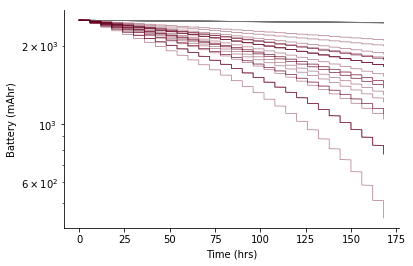

In [22]:
def add_t(d,t):
    res = copy.deepcopy(d)
    res['t'] = t
    return res
import pandas as pd
fig,ax = plt.subplots(1)
def plot(res, ax, color):
    df = pd.DataFrame([add_t(d,t) for t,d,px in res])
    nodes = [col for col in df.columns if col not in ['0', 't']]
    for node in nodes:
        ax.plot(df['t'],df[node], linestyle='-', linewidth=0.75, marker='o', markersize=0,color=color, alpha=0.5)
    #ax.set_xlim([0,500])
    return ax

ax = plot(intel_result,ax,'#737373')
plot(naive_result,ax,'#67001f')
ax.set_xlabel('Time (hrs)')
ax.set_ylabel('Battery (mAhr)')
ax.set_yscale('log')
sns.despine()

In [ ]:
fig,ax = plt.subplots(1)
def plot_px(res, color,ax):
    df = pd.DataFrame([add_t(px,t) for t,d,px in res])
    nodes = [col for col in df.columns if col not in ['0',0, 't']]
    for node in nodes:
        ax.plot(df['t'],df[node], linestyle='-', linewidth=0.75, marker='o', markersize=1, alpha=1)
    #ax.set_xlim([0,500])
    return ax
ax = plot_px(intel_result, '#737373',ax)
plot_px(naive_result, '#737373',ax)
sns.despine()